In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
a = np.linspace(0,99,100)
index = a*2

Let's build a Pandas DataFrame using the data above (a) with a non-basic index (i.e. instead of 0, 1, 2.., we have 0, 2, 4, 6...).

In [45]:
df = pd.DataFrame(data=a,columns=['numbers'],index=index)

In [46]:
df.head()

,numbers
0.0,0.0
2.0,1.0
4.0,2.0
6.0,3.0
8.0,4.0


Pandas offers 2 way to select data from the DataFrame, "loc" and "iloc". The loc selector actually goes into the index column and looks for the key value supplied. In auto-indexed DataFrames, where the index is 0,1,2,.. automatically, then this is basically the same as iloc. In this example, I've setup the index to be "non-trivial" to showcase the difference. 

In [48]:
df.loc[10.0]

numbers    5.0
Name: 10.0, dtype: float64

As you can see above, the DataFrame loc where the value is 10.0 is returned with a a value of 5.0. So here we've selected location "10.0", so the location with name = 10.0. The column value there is 5.0.

Next, lets use "iloc" (index location) to select data. Here the selection is done against the simple index position in the DataFrame. So .iloc[10] simply returns the element at the 10th row

In [65]:
df.iloc[10]

numbers    10.0
Name: 20.0, dtype: float64

Conditional logic can also be used to select data. Below we select all the numbers greater than 50 but less than 50. We can simply print this out or create a new DataFrame based on the result that is returned

In [147]:
df.loc[(df['numbers']>50) & (df['numbers'] < 60)]

,numbers
102.0,51.0
104.0,52.0
106.0,53.0
108.0,54.0
110.0,55.0
112.0,56.0
114.0,57.0
116.0,58.0
118.0,59.0


In [67]:
df2 = df.loc[(df['numbers']>50) & (df['numbers'] < 60)]

Pandas can also import data easily via the read_csv function

In [70]:
df3 = pd.read_csv('CO2_Iso_1_wave.txt')

## Advanced data importing and DataFrame creation:
Python's "glob" module (i.e. global) is a great tool for retrieving files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules. 

In [136]:
import glob

In [137]:
file_list = sorted(glob.glob('*.txt'))

In [138]:
file_list

['CO2_Iso_1_lines.txt', 'CO2_Iso_1_wave.txt']

In [139]:
CO2 = pd.concat((pd.read_csv(file, header=None) for file in file_list), axis='columns')

 But now, the Columns name are just 0. As shown:

In [140]:
CO2.head()

,0,0
0,2.385139,666.677153
1,2.439980,666.687153
2,2.497061,666.697153
3,2.556291,666.707153
4,2.617551,666.717153


We can fix this by simply renaming them via the "columns" label:

In [142]:
CO2.columns = ['abs. lines','wavenumber']

In [143]:
CO2.head()

,abs. lines,wavenumber
0,2.385139,666.677153
1,2.439980,666.687153
2,2.497061,666.697153
3,2.556291,666.707153
4,2.617551,666.717153


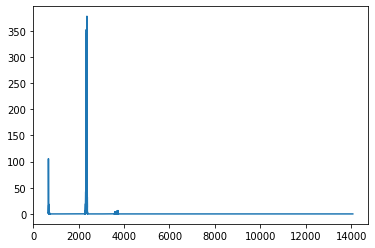

In [145]:
plt.plot(CO2['wavenumber'],CO2['abs. lines'])